In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,max_error


In [2]:
### to use full dataset comment off following line

# dataset = pd.read_csv("../0.Datasets/processed/processed_car_data.csv")
dataset = pd.read_csv("../0.Datasets/processed/sliced_car_data.csv")
dataset.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00


In [3]:
x = dataset['mmr']
x.head()

0    24300.0
1    34200.0
2    20100.0
3    24000.0
4    67000.0
Name: mmr, dtype: float64

In [4]:
y = dataset['sellingprice']
y.head()

0     7200.0
1    30000.0
2    14700.0
3    23750.0
4    65000.0
Name: sellingprice, dtype: float64

In [5]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = x.values.reshape(-1, 1)
x = imp.fit_transform(x)
print(type(x))


y = y.values.reshape(-1, 1)
y = imp.fit_transform(y)
y = y.reshape(-1)
print(type(y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [84]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [85]:
x_train_scaled

array([[ 0.01594149],
       [ 0.92123843],
       [ 2.21002922],
       [-0.73847263],
       [-1.04966846],
       [-0.70075193],
       [-0.60645016],
       [ 0.02851506],
       [ 1.60021114],
       [ 1.0532609 ],
       [-0.49328804],
       [-0.47442769],
       [-1.05909863],
       [-0.70703871]])

In [86]:
reg = LinearRegression()

strat_time = time.time()
reg.fit(x_train_scaled, y_train)
end_time = time.time()

print(f"execution time {end_time - strat_time}")

execution time 0.003030538558959961


In [87]:
Y_predict = reg.predict(x_test_scaled)
Y_predict

array([65675.93590533, 31636.8029475 , 27216.1363296 , 49540.50274999,
        6660.03655636, 29426.46963855])

In [88]:
y_test

array([64250., 30000., 27500., 34000., 11500., 30500.])

In [89]:
print(f'r2 score :{r2_score(y_test, Y_predict)}')
print(f'mean_absolute_error :{mean_absolute_error(y_test, Y_predict)}')
print(f'mean_squared_error :{mean_squared_error(y_test, Y_predict)}')
print(f'max_error :{max_error(y_test, Y_predict)}')


r2 score :0.8176277149185321
mean_absolute_error :4133.433179720406
mean_squared_error :45146322.49562747
max_error :15540.502749994572


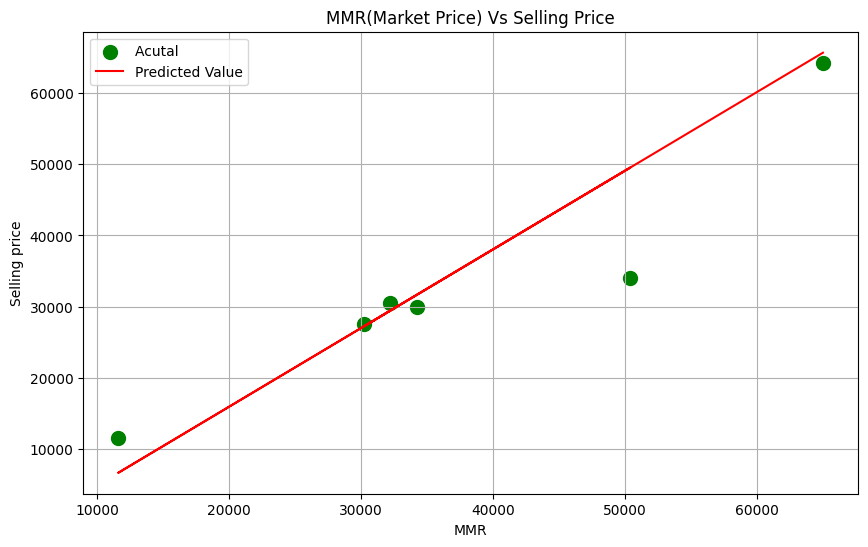

In [90]:
plt.figure(figsize=(10,6))

plt.scatter(x_test, y_test, color = 'Green', label= 'Acutal ',s=100)
plt.plot(x_test,Y_predict, label ='Predicted Value', color ='red')

plt.xlabel('MMR')
plt.ylabel('Selling price')
plt.title("MMR(Market Price) Vs Selling Price")

plt.legend()
plt.grid()
plt.savefig("./Graph/1._mmr_vs_sellingprice_regression_line.png")
plt.show()

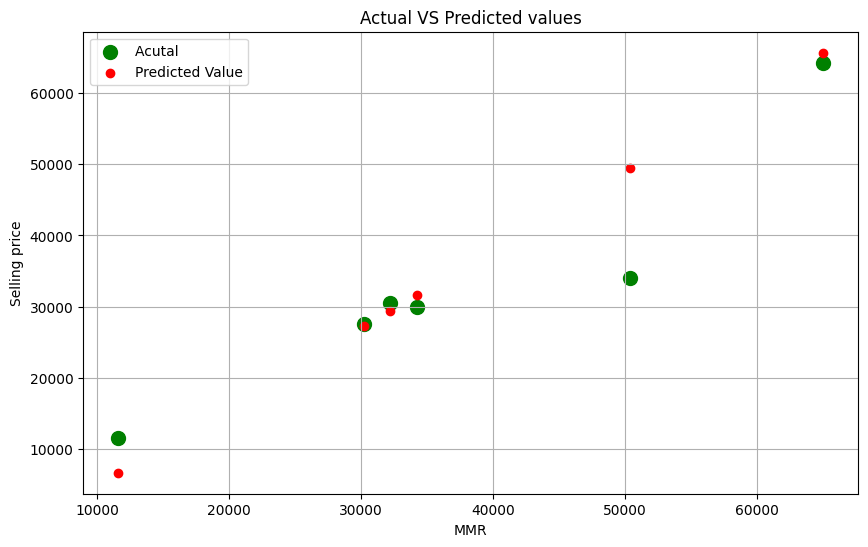

In [91]:
plt.figure(figsize=(10,6))

plt.scatter(x_test, y_test, color = 'Green', label= 'Acutal ',s=100)
plt.scatter(x_test,Y_predict, label ='Predicted Value', color ='red')

plt.xlabel('MMR')
plt.ylabel('Selling price')
plt.title("Actual VS Predicted values")

plt.legend()
plt.grid()
plt.savefig("./Graph/1.actual_vs_predicted.png")
plt.show()